In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# read expression data
expr = pd.read_csv('data/TCGA.HNSC.expression.txt', sep='\t', header=0, index_col=[0,1])
print("expression data shape: ", expr.shape)
# read meta data
meta = pd.read_csv('data/TCGA.HNSC.metadata.txt', sep='\t', header=0, index_col=0)
print("meta data shape: ", meta.shape)
# get meta data per sample
meta = expr.reset_index()[['patient_id','sample_id']].join(meta, on='patient_id').set_index(['patient_id','sample_id'])
print("meta data shape: ", meta.shape)
meta.head()


expression data shape:  (545, 20531)
meta data shape:  (500, 18)
meta data shape:  (545, 18)


,,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,histological_type,histological_grade,tumor_status,vital_status,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
patient_id,sample_id,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J,TCGA-4P-AA8J-01A-11R-A39I-07,HNSC,66.0,MALE,BLACK OR AFRICAN AMERICAN,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,TUMOR FREE,Alive,0.0,102.0,0.0,102.0,NaN,NaN,0.0,102.0,NaN
TCGA-BA-4074,TCGA-BA-4074-01A-01R-1436-07,HNSC,69.0,MALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G3,WITH TUMOR,Dead,1.0,462.0,1.0,462.0,NaN,NaN,1.0,396.0,NaN
TCGA-BA-4075,TCGA-BA-4075-01A-01R-1436-07,HNSC,49.0,MALE,BLACK OR AFRICAN AMERICAN,Stage III,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,283.0,1.0,283.0,NaN,NaN,1.0,236.0,NaN
TCGA-BA-4076,TCGA-BA-4076-01A-01R-1436-07,HNSC,39.0,MALE,WHITE,[Not Available],Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,415.0,1.0,415.0,NaN,NaN,1.0,286.0,NaN
TCGA-BA-4077,TCGA-BA-4077-01B-01R-1436-07,HNSC,45.0,FEMALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,1134.0,1.0,1134.0,NaN,NaN,1.0,1134.0,NaN


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
import umap
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score


# Handle missing values in metadata
metadata = meta.fillna("Unknown")






/data/space1/BooleanLab/Atishna/ece204_project1/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
label_group=meta.columns[7]
meta["tumor_status"].values

array(['TUMOR FREE', 'WITH TUMOR', 'WITH TUMOR', 'WITH TUMOR',
       'WITH TUMOR', 'WITH TUMOR', 'WITH TUMOR', 'TUMOR FREE',
       'TUMOR FREE', 'WITH TUMOR', 'TUMOR FREE', 'TUMOR FREE',
       'TUMOR FREE', 'TUMOR FREE', 'WITH TUMOR', 'WITH TUMOR',
       'TUMOR FREE', nan, 'WITH TUMOR', 'WITH TUMOR', 'WITH TUMOR',
       'TUMOR FREE', 'TUMOR FREE', 'TUMOR FREE', 'TUMOR FREE',
       'WITH TUMOR', 'WITH TUMOR', 'TUMOR FREE', 'WITH TUMOR',
       'WITH TUMOR', 'TUMOR FREE', 'WITH TUMOR', 'WITH TUMOR',
       'WITH TUMOR', 'TUMOR FREE', 'TUMOR FREE', 'WITH TUMOR',
       'TUMOR FREE', 'WITH TUMOR', 'WITH TUMOR', 'WITH TUMOR',
       'TUMOR FREE', 'TUMOR FREE', 'TUMOR FREE', 'WITH TUMOR',
       'TUMOR FREE', 'WITH TUMOR', 'WITH TUMOR', 'TUMOR FREE',
       'WITH TUMOR', 'TUMOR FREE', 'TUMOR FREE', 'TUMOR FREE',
       'TUMOR FREE', 'WITH TUMOR', 'TUMOR FREE', 'TUMOR FREE',
       'TUMOR FREE', 'TUMOR FREE', 'WITH TUMOR', 'TUMOR FREE',
       'TUMOR FREE', 'TUMOR FREE', 'WITH TUMOR', '

In [11]:
label_group = meta[(meta.shape[0] - 12): (meta.shape[0] - 11)] 
label_group

,,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,histological_type,histological_grade,tumor_status,vital_status,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
patient_id,sample_id,,,,,,,,,,,,,,,,,,
TCGA-UF-A7JF,TCGA-UF-A7JF-01A-11R-A34R-07,HNSC,80.0,MALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,TUMOR FREE,Alive,0.0,1686.0,0.0,1686.0,NaN,NaN,0.0,1686.0,NaN


In [5]:
from anndata import read_h5ad
adata = read_h5ad('data/TCGA.HNSC.embedded.h5ad')
embedding_pca=adata.obsm['pca'] # PCA embedding
embedding_mds=adata.obsm['mds']
embedding_tsne=adata.obsm['tsne']
embedding_umap=adata.obsm['umap']

In [8]:
import sys 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from openTSNE import TSNE
import umap

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
import hdbscan
from sklearn import mixture

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score

from time import time
import seaborn as sns
filename = 'graph.csv'
# set the number of clusters as the number of groups in data
num_clusters = 2


# K-means
km = KMeans(n_clusters = num_clusters, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
kmeans_umap = km.fit_predict(embedding_umap)
kmeans_tsne = km.fit_predict(embedding_tsne)
kmeans_mds = km.fit_predict(embedding_mds)
kmeans_pca = km.fit_predict(embedding_pca)

# Hierarchical clustering:  AgglomerativeClustering
clusterer_hierarchical = AgglomerativeClustering(n_clusters = num_clusters )
hc_umap = clusterer_hierarchical.fit_predict(embedding_umap)
hc_tsne = clusterer_hierarchical.fit_predict(embedding_tsne)
hc_mds = clusterer_hierarchical.fit_predict(embedding_mds)
hc_pca = clusterer_hierarchical.fit_predict(embedding_pca)

# SpectralClustering
spectral_Clustering = SpectralClustering(n_clusters = num_clusters, assign_labels="discretize", random_state=0)
spc_umap = spectral_Clustering.fit_predict(embedding_umap)
spc_tsne = spectral_Clustering.fit_predict(embedding_tsne)
spc_mds = spectral_Clustering.fit_predict(embedding_mds)
spc_pca = spectral_Clustering.fit_predict(embedding_pca)

# Gaussian mixture model
gmm = mixture.GaussianMixture(n_components = num_clusters, covariance_type='full', reg_covar=1e-4)
gmm_umap = gmm.fit_predict(embedding_umap)
gmm_tsne = gmm.fit_predict(embedding_tsne)
gmm_mds = gmm.fit_predict(embedding_mds)
gmm_pca = gmm.fit_predict(embedding_pca)


# HDBSCAN
clusterer_hdbscan = hdbscan.HDBSCAN(min_cluster_size = 10, gen_min_span_tree=True)
hdbscan_umap = clusterer_hdbscan.fit_predict(embedding_umap)
hdbscan_tsne = clusterer_hdbscan.fit_predict(embedding_tsne)
hdbscan_mds = clusterer_hdbscan.fit_predict(embedding_mds)
hdbscan_pca = clusterer_hdbscan.fit_predict(embedding_pca)

#clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', edge_alpha=0.6, node_size=80, edge_linewidth=2)
#clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
#clusterer.condensed_tree_.plot()

cluster_result = [kmeans_umap,kmeans_tsne,kmeans_mds,kmeans_pca, 
                  hc_umap,hc_tsne,hc_mds,hc_pca,
                  spc_umap,spc_tsne,spc_mds,spc_pca,
                  gmm_umap,gmm_tsne,gmm_mds,gmm_pca,
                  hdbscan_umap,hdbscan_tsne,hdbscan_mds,hdbscan_pca]


file = open("clustering_accuracy_NMI.txt","a") #append mode 
file.write( filename + "\n") 
for _, cluster in enumerate(cluster_result): 
   nmi = normalized_mutual_info_score(metadata["histological_grade"].values, cluster)
   file.write(str(nmi) + "\n")
file.close()

file = open("clustering_accuracy_ARI.txt","a") #append mode 
file.write( filename + "\n") 
for _, cluster in enumerate(cluster_result): 
   ari = adjusted_rand_score(metadata["histological_grade"].values, cluster)
   file.write(str(ari) + "\n")
file.close()


/data/space1/BooleanLab/Atishna/ece204_project1/.venv/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/data/space1/BooleanLab/Atishna/ece204_project1/.venv/lib/python3.9/site-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/data/space1/BooleanLab/Atishna/ece204_project1/.venv/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [31]:
metadata["histological_grade"].values

array(['G2', 'G3', 'G2', 'G2', 'G2', 'G2', 'G2', 'G1', 'G2', 'G2', 'G2',
       'G3', 'G2', 'G1', 'G3', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G1',
       'G2', 'G3', 'G3', 'G1', 'G2', 'G2', 'G1', 'G2', 'G2', 'G2', 'G2',
       'G2', 'G2', 'G2', 'G3', 'G3', 'G2', 'G3', 'G2', 'GX', 'G3', 'G3',
       'G2', 'G2', 'G3', 'G2', 'GX', 'G2', 'G1', 'G1', 'G2', 'G2', 'G2',
       'G2', 'G2', 'G2', 'G2', 'G3', 'G3', 'G2', 'G3', 'G2', 'G2', 'G2',
       'G2', 'G2', 'G2', 'G3', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G3',
       'G2', 'G2', 'G2', 'G2', 'G3', 'G3', 'G1', 'G3', 'G2', 'G3', 'G2',
       'G3', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G3', 'GX', 'G2', 'G3',
       'G2', 'G2', 'G2', 'G2', 'G2', 'G3', 'G2', 'G2', 'G1', 'G2', 'G2',
       'G3', 'GX', 'G3', 'G3', 'G2', 'G2', 'G2', 'G3', 'G2', 'GX', 'G3',
       'GX', 'GX', 'G2', 'G2', 'G2', 'G3', 'G2', 'G2', 'G3', 'G2', 'G2',
       'G3', 'G2', 'G2', 'G2', 'G2', 'G3', 'G2', 'G2', 'G3', 'G2', 'G2',
       'G2', 'G2', 'G1', 'G2', 'G2', 'G2', 'G2', 'G

In [49]:
import sys 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from openTSNE import TSNE
import umap

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
import hdbscan
from sklearn import mixture

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score

from time import time
import seaborn as sns
filename = 'graph.csv'
# set the number of clusters as the number of groups in data
num_clusters = 5


# K-means
km = KMeans(n_clusters = num_clusters, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
kmeans_umap = km.fit_predict(embedding_umap)
kmeans_tsne = km.fit_predict(embedding_tsne)
kmeans_mds = km.fit_predict(embedding_mds)
kmeans_pca = km.fit_predict(embedding_pca)

# Hierarchical clustering:  AgglomerativeClustering
clusterer_hierarchical = AgglomerativeClustering(n_clusters = num_clusters )
hc_umap = clusterer_hierarchical.fit_predict(embedding_umap)
hc_tsne = clusterer_hierarchical.fit_predict(embedding_tsne)
hc_mds = clusterer_hierarchical.fit_predict(embedding_mds)
hc_pca = clusterer_hierarchical.fit_predict(embedding_pca)

# SpectralClustering
spectral_Clustering = SpectralClustering(n_clusters = num_clusters, assign_labels="discretize", random_state=0)
spc_umap = spectral_Clustering.fit_predict(embedding_umap)
spc_tsne = spectral_Clustering.fit_predict(embedding_tsne)
spc_mds = spectral_Clustering.fit_predict(embedding_mds)
spc_pca = spectral_Clustering.fit_predict(embedding_pca)

# Gaussian mixture model
gmm = mixture.GaussianMixture(n_components = num_clusters, covariance_type='spherical', reg_covar=1e-4)
gmm_umap = gmm.fit_predict(embedding_umap)
gmm_tsne = gmm.fit_predict(embedding_tsne)
gmm_mds = gmm.fit_predict(embedding_mds)
gmm_pca = gmm.fit_predict(embedding_pca)


# HDBSCAN
clusterer_hdbscan = hdbscan.HDBSCAN(min_cluster_size = 10, gen_min_span_tree=True)
hdbscan_umap = clusterer_hdbscan.fit_predict(embedding_umap)
hdbscan_tsne = clusterer_hdbscan.fit_predict(embedding_tsne)
hdbscan_mds = clusterer_hdbscan.fit_predict(embedding_mds)
hdbscan_pca = clusterer_hdbscan.fit_predict(embedding_pca)

#clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', edge_alpha=0.6, node_size=80, edge_linewidth=2)
#clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
#clusterer.condensed_tree_.plot()

cluster_result = [kmeans_umap,kmeans_tsne,kmeans_mds,kmeans_pca, 
                  hc_umap,hc_tsne,hc_mds,hc_pca,
                  spc_umap,spc_tsne,spc_mds,spc_pca,
                  gmm_umap,gmm_tsne,gmm_mds,gmm_pca,
                  hdbscan_umap,hdbscan_tsne,hdbscan_mds,hdbscan_pca]


file = open("clustering_accuracy_NMI.txt","a") #append mode 
file.write( filename + "\n") 
for _, cluster in enumerate(cluster_result): 
   nmi = normalized_mutual_info_score(metadata["gender"].values, cluster)
   file.write(str(nmi) + "\n")
file.close()

file = open("clustering_accuracy_ARI.txt","a") #append mode 
file.write( filename + "\n") 
for _, cluster in enumerate(cluster_result): 
   ari = adjusted_rand_score(metadata["gender"].values, cluster)
   file.write(str(ari) + "\n")
file.close()


/data/space1/BooleanLab/Atishna/ece204_project1/.venv/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/data/space1/BooleanLab/Atishna/ece204_project1/.venv/lib/python3.9/site-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/data/space1/BooleanLab/Atishna/ece204_project1/.venv/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


ValueError: Fitting the mixture model failed because some components have ill-defined empirical covariance (for instance caused by singleton or collapsed samples). Try to decrease the number of components, or increase reg_covar.

In [9]:
kmeans_umap

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,

In [10]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

# Extract tumor status values from metadata
tumor_values=meta["tumor_status"].values
data = metadata['tumor_status'].values
# Encode tumor status values as numbers
le = LabelEncoder()
tumor_labels = le.fit_transform(tumor_values)

# Calculate the silhouette score for KMeans clustering
kmeans_silhouette_score = silhouette_score(adata.obsm["X_log1p_scaled"], kmeans_pca)
print("Silhouette Score for KMeans clustering: ", kmeans_silhouette_score)



Silhouette Score for KMeans clustering:  0.40670878


/data/space1/BooleanLab/Atishna/ece204_project1/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


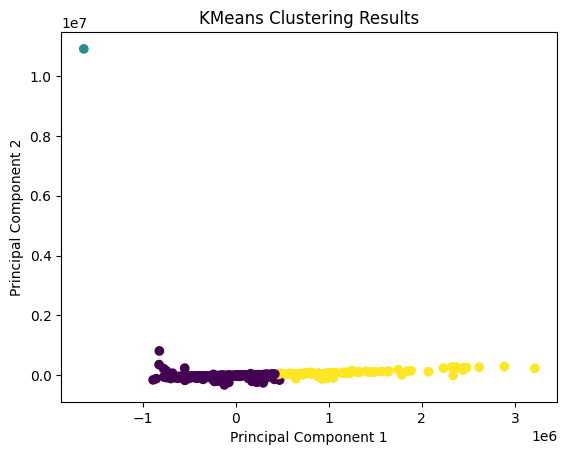

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(embedding_pca)

# Get cluster labels
labels = kmeans.labels_


# Plot results
plt.scatter(embedding_pca[:, 0], embedding_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering Results')
plt.show()

In [ ]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_metadata['cancer_type'], legend='full', palette='viridis')